# 모듈 불러오기

In [2]:
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os  #로컬 파일 불러오기 위한 모듈
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, utils

from keras.utils import np_utils   #to_categorical, 원핫인코딩
from sklearn.model_selection import KFold   #교차 검증
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score  #모델 평가 지표

# 데이터셋 전처리

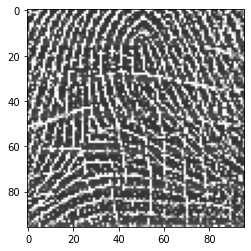

In [3]:
path='C:/Users/clari/Desktop/fingerprint/01_finger_training'

images = []
labels = []
# 로컬 이미지 파일을 불러오고 img_trim
def crop_images(path, images):
    for img in os.listdir(path):
      img_array = cv.imread(os.path.join(path, img))
      img_crop = img_trim(img_array)/255.0
      images.append(img_crop)
    
      #1~8의 클래스를 0/1로 이뤄진 벡터로 변환. one-hot encoding
      label = np_utils.to_categorical(int(img[0])-1, 8)
      labels.append(label)
    
# 이미지 불필요한 부분 자르기
def img_trim (img):     
    x = 24; y = 24;
    w = 96; h = 96;
    img_trim = img[y:y+h, x:x+w]
    return img_trim

crop_images(path, images)
plt.imshow(images[0])

In [4]:
images = np.array(images)
labels = np.array(labels)

# 모델 정의

In [33]:
model = models.Sequential()  # 레이어를 층층히 쌓아가는 연쇄 모델

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding='Same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 및 교차검증

In [34]:
#Cross validation
num=5
cross=KFold(n_splits=num, shuffle=True, random_state=2021)
accs = [];  precision=[];  recall=[];  F1=[]
result=[]

for train_index,test_index in cross.split(images, labels):
    #훈련용
    x_train=images[train_index] #shape: (64, 96, 96, 3)
    y_train=labels[train_index] #shape: (64, 8)
    #검증용
    x_test=images[test_index] #shape: (16, 96, 96, 3))
    y_test=labels[test_index] #shape: (16, 8)
    
    #훈련용 데이터에 대해 model 학습
    model.fit(x_train, y_train, epochs=20, batch_size=5)

    
    #검증용 데이터로 모델 평가
    y_test =np.argmax(y_test,axis=1)
    pred = np.argmax(model.predict(x_test).round(), axis=1)

    #X=이미지, Y=라벨
    print('x_train: ',x_train.shape)    
    print('y_train: ',y_train.shape)
    print('y_test: ',y_test+1)
    print('예측값: ',pred+1)
    print('------------------------------------------------------------------------')
    
    #정확도 평가 지표
    accs.append(accuracy_score(y_test, pred))
    precision.append(precision_score(y_test,pred, average='macro'))
    recall.append(recall_score(y_test, pred, average='macro'))
    F1.append(f1_score(y_test, pred, average='macro'))


Epoch 1/20
13/13 [==============================] - 2s 98ms/step - loss: 4.0979 - accuracy: 0.2450
Epoch 2/20
13/13 [==============================] - 1s 87ms/step - loss: 1.9004 - accuracy: 0.3755
Epoch 3/20
13/13 [==============================] - 1s 90ms/step - loss: 1.3744 - accuracy: 0.5388
Epoch 4/20
13/13 [==============================] - 1s 91ms/step - loss: 0.6153 - accuracy: 0.8953
Epoch 5/20
13/13 [==============================] - 1s 92ms/step - loss: 0.2686 - accuracy: 0.9362
Epoch 6/20
13/13 [==============================] - 1s 93ms/step - loss: 0.0766 - accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 1s 97ms/step - loss: 0.0355 - accuracy: 1.0000
Epoch 8/20
13/13 [==============================] - 1s 95ms/step - loss: 0.1717 - accuracy: 0.9354
Epoch 9/20
13/13 [==============================] - 1s 95ms/step - loss: 0.0634 - accuracy: 1.0000
Epoch 10/20
13/13 [==============================] - 1s 97ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 11/

13/13 [==============================] - 1s 91ms/step - loss: 8.2457e-04 - accuracy: 1.0000
Epoch 16/20
13/13 [==============================] - 1s 94ms/step - loss: 3.8439e-04 - accuracy: 1.0000
Epoch 17/20
13/13 [==============================] - 1s 89ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/20
13/13 [==============================] - 1s 90ms/step - loss: 1.5883e-04 - accuracy: 1.0000
Epoch 19/20
13/13 [==============================] - 1s 87ms/step - loss: 3.4065e-04 - accuracy: 1.0000
Epoch 20/20
13/13 [==============================] - 1s 90ms/step - loss: 2.0306e-04 - accuracy: 1.0000 0s - loss: 1.1505e-04 - ac
x_train:  (64, 96, 96, 3)
y_train:  (64, 8)
y_test:  [1 1 2 2 4 5 5 6 6 6 6 6 7 7 8 8]
예측값:  [1 1 2 2 4 5 5 6 6 6 6 6 7 7 8 8]
------------------------------------------------------------------------
Epoch 1/20
13/13 [==============================] - 1s 100ms/step - loss: 2.5090e-04 - accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 1s 101ms/

In [35]:
for i in range(1,num+1):
    print("Fold%d 훈련 결과 : "%i)
    print("     accs : %.6f"%accs[i-1])
    print("     precision : %.6f"%precision[i-1])
    print("     recall : %.6f"%recall[i-1])
    print("     F1 : %.6f"%F1[i-1])

print("\n평균 훈련 결과")
print("     Accuracy : %.6f"%np.mean(accs))
print("     Precision : %.6f"%np.mean(precision))
print("     Recall Score : %.6f"%np.mean(recall))
print("     F1-Score : %.6f"%np.mean(F1))

Fold1 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold2 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold3 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold4 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000
Fold5 훈련 결과 : 
     accs : 1.000000
     precision : 1.000000
     recall : 1.000000
     F1 : 1.000000

평균 훈련 결과
     Accuracy : 1.000000
     Precision : 1.000000
     Recall Score : 1.000000
     F1-Score : 1.000000


# 테스트 데이터셋 예측

In [36]:
path='C:/Users/clari/Desktop/fingerprint/01_finger_test'

test_num = []
test_images = []

#테스트 데이터셋 전처리
def crop_test_images(path, test_images):
    for img in os.listdir(path):
      img_array = cv.imread(os.path.join(path, img))
      img_crop = img_trim(img_array)/255.0
      test_images.append(img_crop)
      test_num.append(int(os.path.splitext(img)[0]))

crop_test_images(path, test_images)

In [37]:
test_images = np.array(test_images)
test_num = np.array(test_num)

In [40]:
#테스트 데이터셋 예측
pred = np.argmax(model.predict(test_images).round(), axis=1) +1
result.extend(pred.flatten())

#예측 결과 csv파일로 저장
df = pd.DataFrame({'Images': test_num, 'Answer': pred}).sort_values('Images')
df.to_csv('1871081_이희연_지문_2차_답안.csv', index = False)